# Visualization with Matplotlib

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/phonchi/nsysu-math106A/blob/master/static_files/presentations/12_Matplotlib_interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/phonchi/nsysu-math106A/blob/master/static_files/presentations/12_Matplotlib_interactive.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## Introduction

`Matplotlib` is a multiplatform data visualization library built on `NumPy` `arrays` and designed to work with the broader `SciPy` stack. `Matplotlib` supports numerous backends and output types, which means we can count on it to work regardless of the operating system we are using or the output format we desire. It has led to a large user base, which in turn has resulted in an active developer base and `Matplotlib`'s powerful tools and ubiquity within the scientific `Python` world. Let's install the package first:

In [1]:
package_name = "matplotlib"
package_name2 = "ipympl"

try:
    __import__(package_name)
    print(f"{package_name} is already installed.")
except ImportError:
    print(f"{package_name} not found. Installing...")
    %pip install {package_name}

try:
    __import__(package_name2)
    print(f"{package_name2} is already installed.")
except ImportError:
    print(f"{package_name2} not found. Installing...")
    %pip install {package_name2}

matplotlib is already installed.
ipympl is already installed.


Creating interactive plots within a Jupyter notebook can be accomplished using the `%matplotlib` command. Additionally, we have the option to embed graphics directly in the notebook using `inline` option:

In [2]:
#Interactive backend
#%matplotlib widget 
#Static backend
#%matplotlib inline 
#Interactive backend
%matplotlib ipympl 

Just as we use the `np` shorthand for `NumPy`, we will use some standard shorthands for `Matplotlib` imports:

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

We can choose the style we would like from the [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

## Two interfaces for the `matplotlib`

A feature of `Matplotlib` that may cause confusion is its dual interfaces: a user-friendly functional-style state-based interface and a more powerful object-oriented interface. We'll briefly outline the differences between the two here. Firstly, we create the data we would like to plot. The simplest method, `plot()` accept two `arrays` (`x` and `y`) as inputs. It will plot `y` versus `x` as lines and/or markers.

In [4]:
x = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(x), np.sin(x)
x.shape, C.shape, S.shape

((256,), (256,), (256,))

`x` is now a array with 256 values ranging from $-\pi$ to $\pi$ (included). `C` is the cosine (256 values) and `S` is the sine (256 values).

### Functional Interface

`Matplotlib` was initially developed as a `Python` alternative for `MATLAB` users, and many aspects of its syntax reflect this origin. The `MATLAB`-style tools can be found in the `pyplot` (`plt`) interface. For instance, the following code might appear quite familiar to MATLAB users:

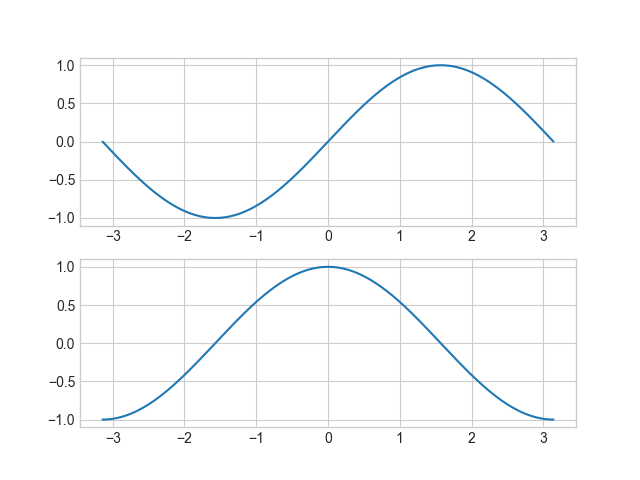

In [5]:
# 1. create a plot figure
plt.figure() 

# 2. create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, S)

# 3. create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, C)

plt.savefig("test.jpg");
# Note that the semicolon at the end of the last line is intentional: it suppresses the textual
# representation of the plot from the output

It's crucial to understand that this interface is ***stateful***: it maintains information about the "current" figure and axes, which serve as the targets for all `plt` commands. We can obtain a reference to these by using the `plt.gcf()` (get current figure) and `plt.gca()` (get current axes) functions.

In [6]:
plt.gca()

<Axes: >

Although the stateful interface is quick and convenient for basic plots, it can lead to difficulties. For instance, after creating the second panel, how can we return to the first one and add something? While this can be achieved using the MATLAB-style interface, it may be somewhat awkward. Thankfully, there is a more efficient solution.

### Object-oriented interface

For more complex scenarios or when greater control over the figure is desired, the object-oriented interface comes in handy. Instead of relying on the concept of an "active" figure or axes, the object-oriented interface treats plotting functions as methods of explicit `Figure` and `Axes` objects.

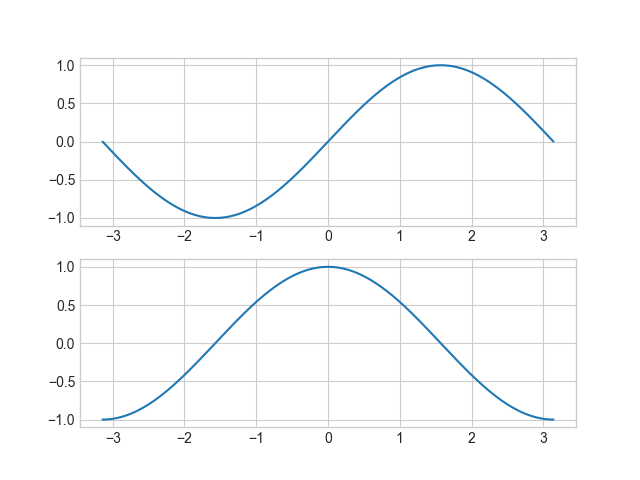

In [7]:
# 1. First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# 2. Call plot() method on the appropriate object
ax[0].plot(x, S)
ax[1].plot(x, C);

In [8]:
ax

array([<Axes: >, <Axes: >], dtype=object)

For basic plots, the choice between the two styles is mainly a matter of personal preference. However, as plots become more intricate, the object-oriented approach may be essential.

In [9]:
fig.savefig("test.pdf")

## Simple plots

### Simple line plots

To create a 2D line plot, follow these general steps:

1. Call the `plt.figure()` to create a new figure. (optional for `%matplotlib inline`)
2. Generate a sequence of $x$ values usually using `linspace()`.
3. Generate a sequence of $y$ values usually by substitute the x values into a function.
4. Input `plt.plot(x, y, [format], **kwargs)` where `[format]` is an (optional) format string, and `**kwargs` are (optional) keyword arguments specifying the line properties of the plot.
5. Utilize `plt` functions to enhance the figure with features such as a title, legend, grid lines, etc.
6. Input `plt.show()` to display the resulting figure (this step is optional in a Jupyter notebook).

Let's begin with a basic example where we try plotting the parabola 
 using 5 points:

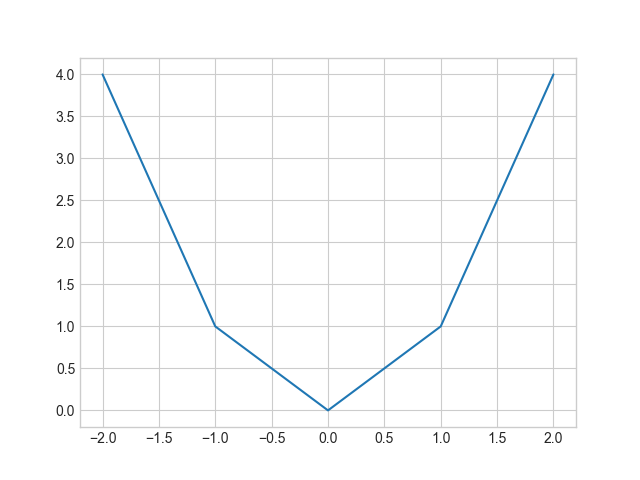

In [10]:
plt.figure() 
x = [-2,-1,0,1,2]
y = [ 4, 1,0,1,4]

plt.plot(x,y);

Key aspects to pay attention to are:

- The sequences `x` and `y` determine the coordinates of the points in the plot.
- The plot's line is formed by connecting these points with straight lines.

The second observation suggests that if we aim to display a smooth curve, we need to plot numerous points; otherwise, the plot will not appear smooth. Let's attempt this again, using the `NumPy` function `np.linspace()` to create 200 points:

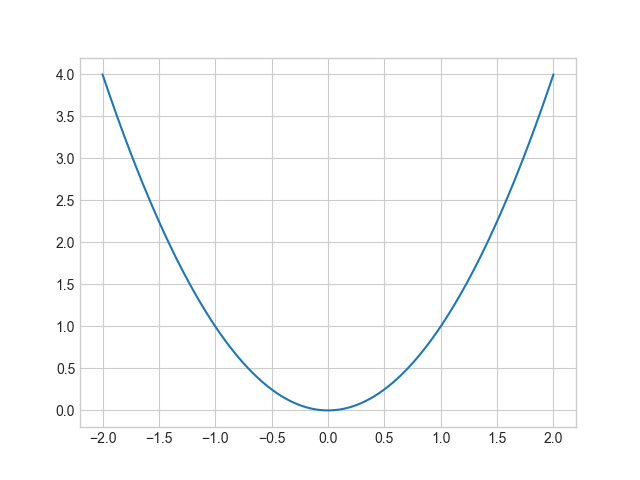

In [11]:
plt.figure() 
x = np.linspace(-2,2,200)
y = x**2
plt.plot(x,y);

Looks much better!

Let's revisit the example with a simple sinusoid:

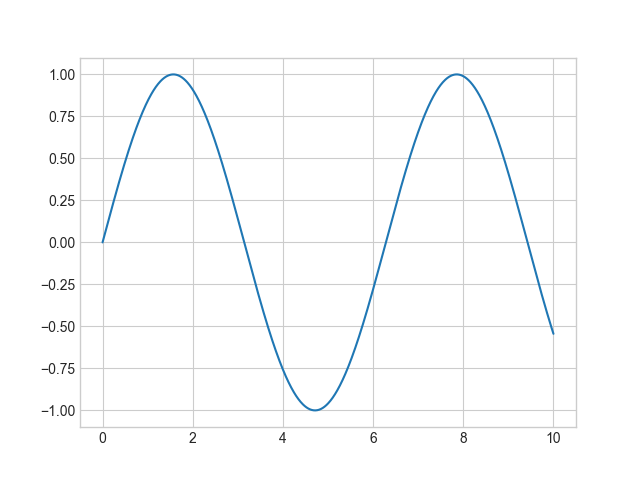

In [12]:
plt.figure() 
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x));
# let the figure and axes be created for us in the background

If we want to create a single figure with multiple lines, we can simply call the `plot()` function multiple times:

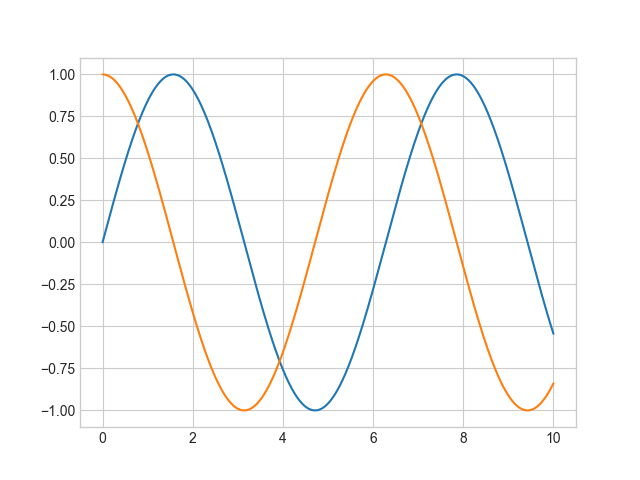

In [13]:
plt.figure() 
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

#### Adjusting the plot: Line colors, styles and widths

One of the initial modifications you might want to make to a plot is adjusting the line colors and styles. The `plt.plot()` function accepts additional arguments that can be employed to define these aspects. To change the color, you can use the `color` keyword, which takes a string argument representing a wide range of possible colors.

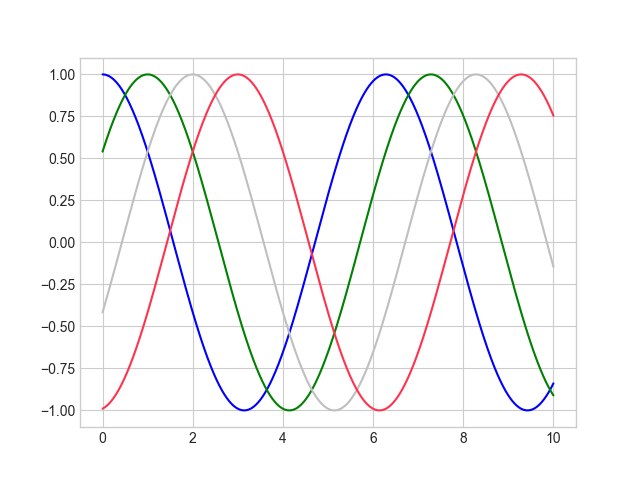

In [14]:
plt.figure() 
plt.plot(x, np.cos(x - 0), color='blue')         # specify color by name
plt.plot(x, np.cos(x - 1), color='g')            # short color code (rgbcmyk)
plt.plot(x, np.cos(x - 2), color='0.75')         # grayscale between 0 and 1
plt.plot(x, np.cos(x - 3), color=(1.0,0.2,0.3)); # RGB tuple, values 0 to 1

Similarly, the line style can be adjusted using the `linestyle` keyword:

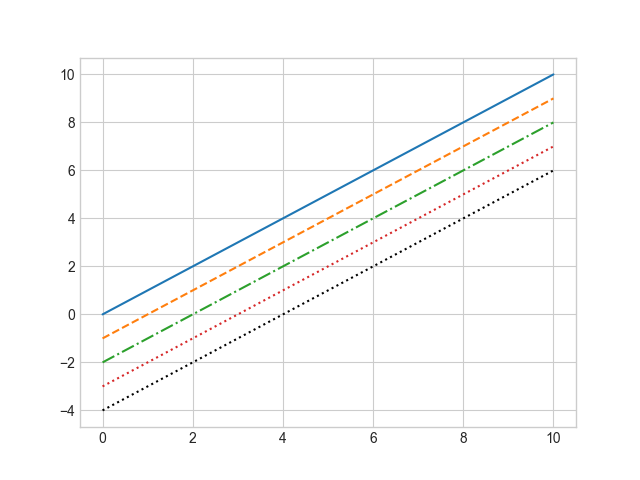

In [15]:
plt.figure() 
plt.plot(x, x - 0, linestyle='-')  # solid
plt.plot(x, x - 1, linestyle='--') # dashed
plt.plot(x, x - 2, linestyle='-.') # dashdot
plt.plot(x, x - 3, linestyle=':')  # dotted
plt.plot(x, x - 4, ':k');          # dotted black (use format string here!)
# You can save some keystrokes by combining these linestyle and color codes into a single non-keyword argument

Finally, you can also adjust the width using `linewidth` keyword:

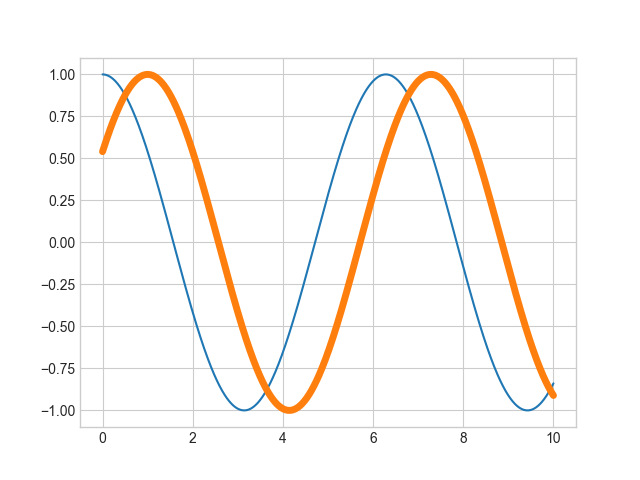

In [16]:
plt.figure() 
plt.plot(x, np.cos(x - 0)) 
plt.plot(x, np.cos(x - 1), linewidth='5');

#### Adjusting the plot: Axes limits

`Matplotlib` generally provides suitable default axes limits for your plot, but in certain cases, having more control can be advantageous. The simplest method to fine-tune the limits is by utilizing the `plt.xlim()` and `plt.ylim()` functions:

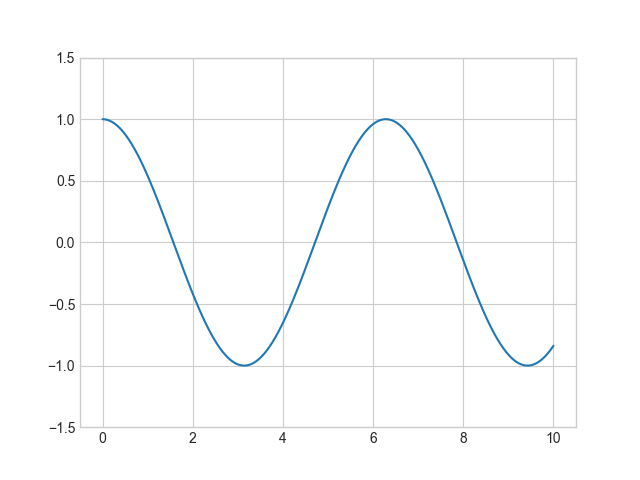

In [17]:
plt.figure() 
plt.plot(x, np.cos(x))

plt.xlim(-0.5, 10.5)
plt.ylim(-1.5, 1.5);

#### Labeling plots

Let's take a quick look at labeling plots. Titles and axis labels are the most basic types of labels — there are methods available to set them quickly. Moreover, when multiple lines appear within a single set of axes, a plot legend can be helpful in labeling each line type. Once again, `Matplotlib` has a built-in method for swiftly creating such a legend, achieved through the `plt.legend()` method:

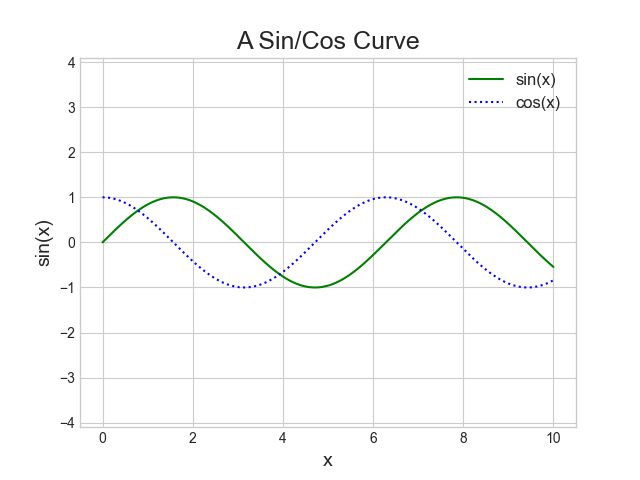

In [18]:
plt.figure() 
plt.plot(x, np.sin(x), '-g', label='sin(x)') # solid green line
plt.plot(x, np.cos(x), ':b', label='cos(x)') # dotted blue line

plt.title("A Sin/Cos Curve", fontsize=18)       # we can also specify the font size
plt.xlabel("x", fontsize=14)
plt.ylabel("sin(x)", fontsize=14)
plt.legend(fontsize=12)

plt.axis('equal');

Note that we can specify color and style of the line simultaneously using the format string. In addition, we use the function `plt.axis('equal')` to force the scaling to be equal on both axes. In addition, the `plt.legend()` function keeps track of the line style and color, and matches these with the correct label!

For more anatomy of a figure, you can refer to the following figure (which is created using the code available [here](https://matplotlib.org/stable/gallery/showcase/anatomy.html)):

<center><img src="https://drive.google.com/uc?id=1zKJuabAWhclAXqLNr-usOpQC_WRiFgnP" width="70%" height="70%"></center>

#### `Matplotlib` tips

While many `plt` functions (Functional interface) have direct `ax` method (OOP interface) equivalents (`plt.plot()` → `ax.plot()`, `plt.legend()` → `ax.legend()`, etc.), this does not apply to all commands. Specifically, functions for setting limits, labels, and titles undergo slight modifications. To transition between MATLAB-style functions and object-oriented methods, implement the following changes:

<div align="center">

|  Functional |      OOP      |
|:-----------:|:-------------:|
| plt.xlabel()  | ax.set_xlabel() |
|  plt.ylabel() | ax.set_ylabel() |
|   plt.xlim()  |  ax.set_xlim()  |
|   plt.ylim()  |  ax.set_ylim()  |
|  plt.title()  |  ax.set_title() |

</div>

### Simple scatter plots

Another frequently used plot type is the basic scatter plot. In this case, points are depicted individually with a dot, circle, or other shape, rather than being connected by line segments. It turns out that the same function can also generate scatter plots:

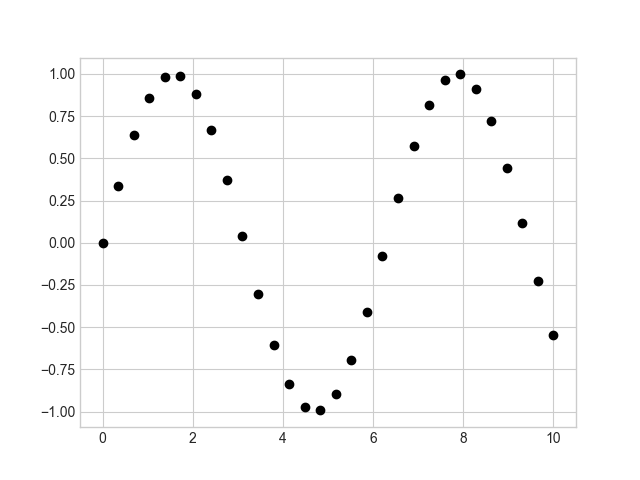

In [19]:
plt.figure() 
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character representing the type of symbol used for plotting. Similar to specifying options like '-' or '--' to control the line style, marker styles also have their own set of brief string codes:

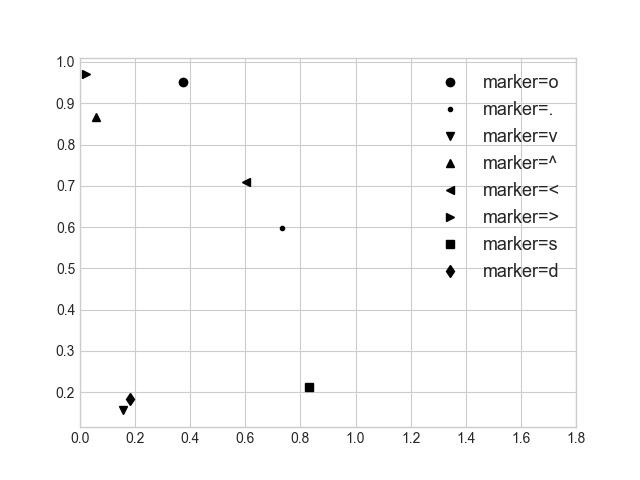

In [20]:
plt.figure() 
np.random.seed(42)

for marker in ['o', '.', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(np.random.random(1), np.random.random(1), marker, color='black', label=f'marker={marker}')

plt.legend(fontsize=13)
plt.xlim(0, 1.8);

For even greater versatility, these character codes can be combined with line and color codes to plot points accompanied by a connecting line. Furthermore, the size or color of the markers can be customized:

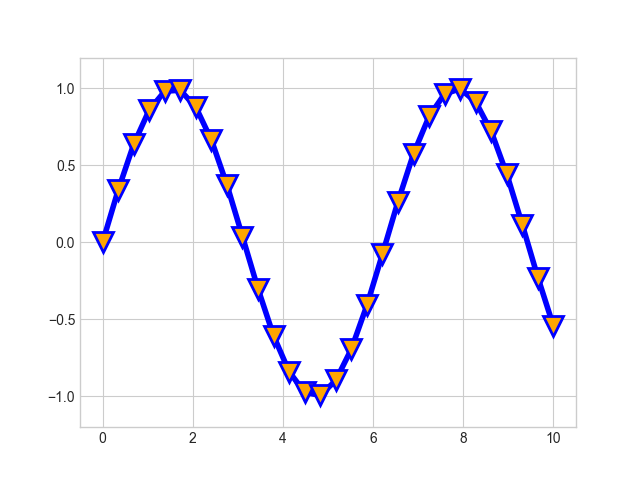

In [21]:
plt.figure() 
plt.plot(x, y, '-vb', markersize=15, linewidth=4, markerfacecolor='orange', markeredgewidth=2)
plt.ylim(-1.2, 1.2);

#### Scatter Plots with `plt.scatter()`

A more advanced method for creating scatter plots is the `plt.scatter()` function. The main advantage of `plt.scatter()` over `plt.plot()` is its ability to generate scatter plots **where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data**. To demonstrate this, let's create a random scatter plot with points of various colors and sizes. To better visualize the overlapping points, we'll also use the `alpha` keyword to adjust the transparency level:

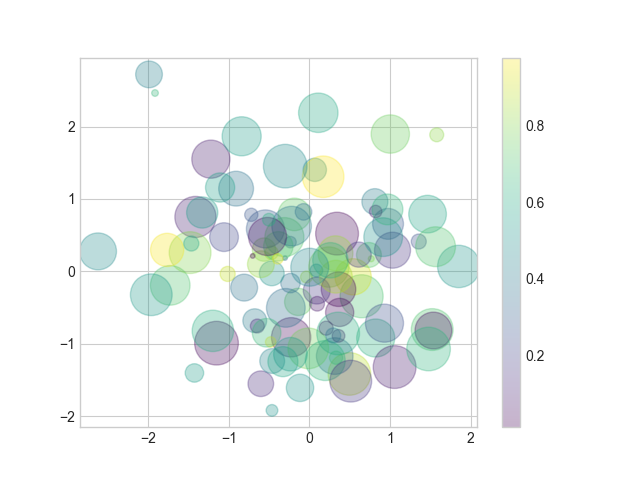

In [22]:
plt.figure() 
np.random.seed(42)

x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000 * np.random.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar(); # show color scale

Observe that the `color` argument is automatically mapped to a color scale (demonstrated here by the `colorbar()` command). Moreover, we can choose a color map using the `cmap` keyword. To view all `Matplotlib` color maps, refer to the [list of colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

### Density plots

#### Histograms, binnings, and density

A basic histogram can be an excellent initial step in comprehending a dataset. We can use `plt.hist()` to calculate and generate a histogram of sample data:

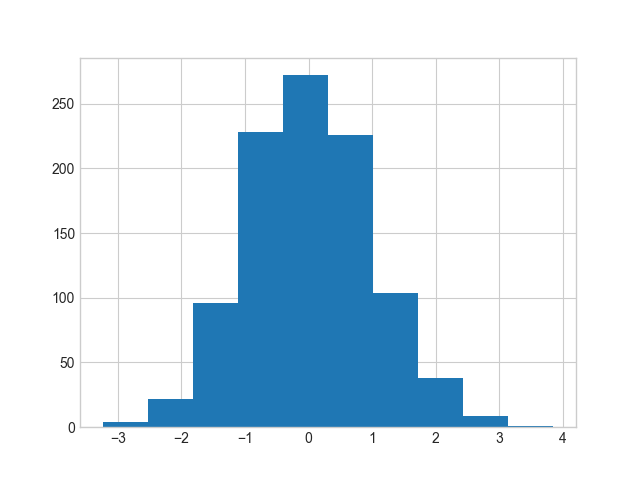

In [23]:
plt.figure() 
np.random.seed(42)
data = np.random.normal(size=1000)
plt.hist(data);

The `hist()` function provides numerous options for fine-tuning the display. Here's an example of a more customized histogram:

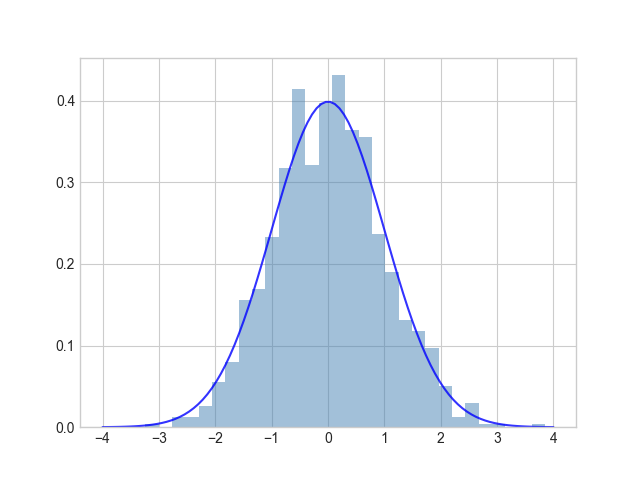

In [24]:
plt.figure() 
plt.hist(data, bins=30, density=True, alpha=0.5, color='steelblue', edgecolor='none')
x = np.linspace(-4,4,100)
y = 1/(2*np.pi)**0.5 * np.exp(-x**2/2) # Standard normal distribution
plt.plot(x,y,'b',alpha=0.8);

The `density=True` keyword argument normalizes the histogram and displays it on the same axes as the data. The `bins` keyword argument specifies the number of bins to use for the histogram. Here, we also superimpose the normal distribution $y = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}$.

> ### Exercise 1: Try to plot the function $\sin(x)/x$ within the range -10 to 10 with evenly spaced 200 points using the solid blue line. Use visual inspection and the following code to check the value of the function when x approaches 1.

```python
# Find the x coordinates closest to 0 using isclose() and masking
x[np.isclose(x, 0, atol=1e-01)]
y[np.isclose(x, 0, atol=1e-01)]
```

Finally, plot the above points with red circle markers on the same plot.

In [25]:
# Your code here

## Advance plot

### Filling the area between lines

Sometimes, it may be useful to fill areas between plots using `plt.fill_between()`:

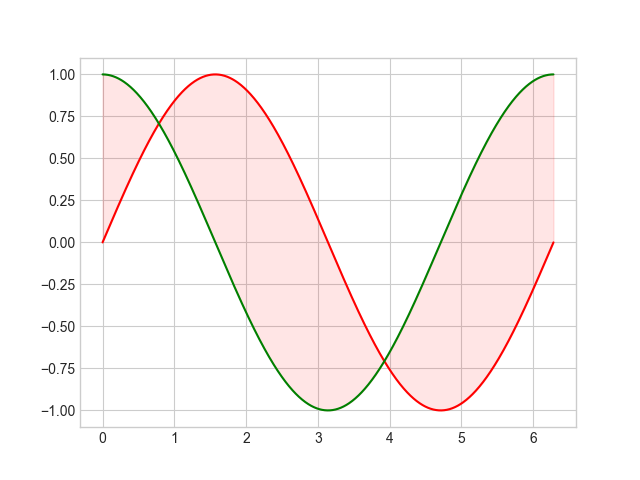

In [26]:
plt.figure() 
x = np.linspace(0, 2*np.pi, 1000)

plt.plot(x, np.sin(x), 'r')
plt.plot(x, np.cos(x), 'g')
plt.fill_between(x, np.cos(x), np.sin(x), color='red', alpha=0.1) #(x, y1, y2) Fill between two sets of y-values.

### Plot in polar coordinate

To plot the figure in different coordinate system, we can use `projection` option of the `plt.axes()` method:

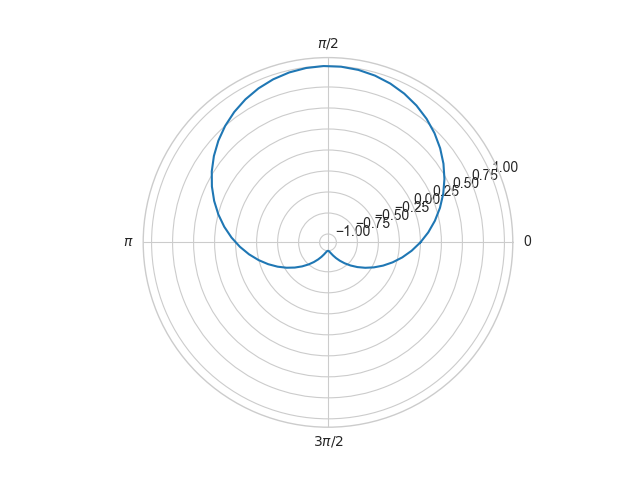

In [27]:
# https://heyankaydai.wixsite.com/calculus-bc/polar
plt.figure() 
t = np.linspace(0, 2*np.pi, 64)

# plot in polar coordinates
plt.axes(projection='polar')
plt.plot(t, np.sin(t), '-'); #or plt.polar(theta, r, '-')


# Set ticks for polar coordinate
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$']);

Note that we would expect that a radius of 0 designates the origin, and a negative radius is reflected across the origin; in particular, the polar coordinates $(r, t)$ and $(-r, t+\pi)$ should designate the same point. We can enforce this behavior using the following code:

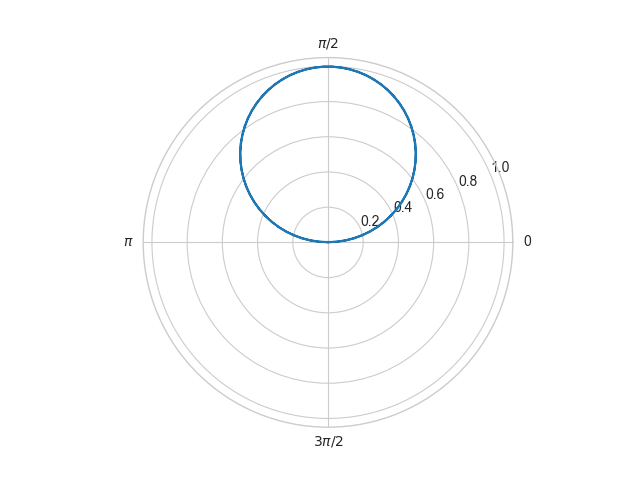

In [28]:
plt.figure() 
t = np.linspace(0, 2*np.pi, 64)
r = np.sin(t)
# plot in polar coordinates
plt.axes(projection='polar')
plt.plot(t+(r<0)*np.pi, np.abs(r), '-')

# Set ticks for polar coordinate
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$']);

## Customizing Plot

### Customizing plot legends

Plot legends provide context to a visualization, attributing meaning to the various plot elements. For instance, we can designate the location and display the frame:

C:\Users\adm\AppData\Local\Temp\ipykernel_36568\3649991525.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


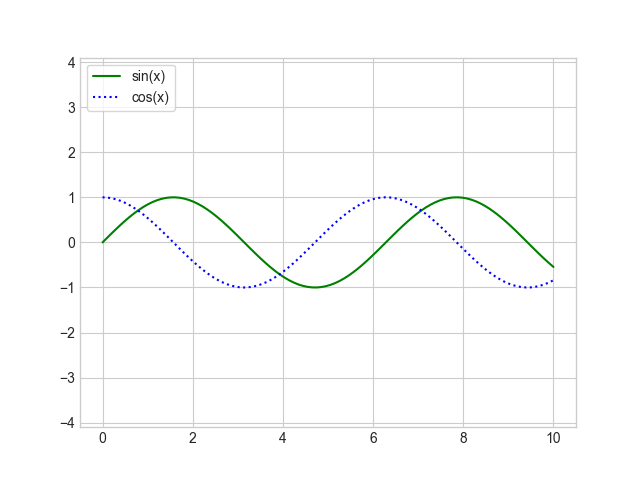

In [29]:
plt.figure() 
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend(loc='upper left', frameon=True);

#### Text and Annotation

Crafting an effective visualization entails leading the viewer so that the figure narrates a tale. In certain situations, this narrative can be communicated solely through visual means, without the need for supplementary text, but in others, brief textual indicators and labels are required. Axis labels and titles are the most fundamental types of annotations that we'll employ.

When visualizing data, it's frequently beneficial to annotate particular features of the plot to attract the viewer's attention. This can be done manually using the `plt.text()` function, which positions text at a specified x/y value. Furthermore, we can use the `plt.annotate()` function, which generates text and an arrow and enables the arrows to be specified with great flexibility.

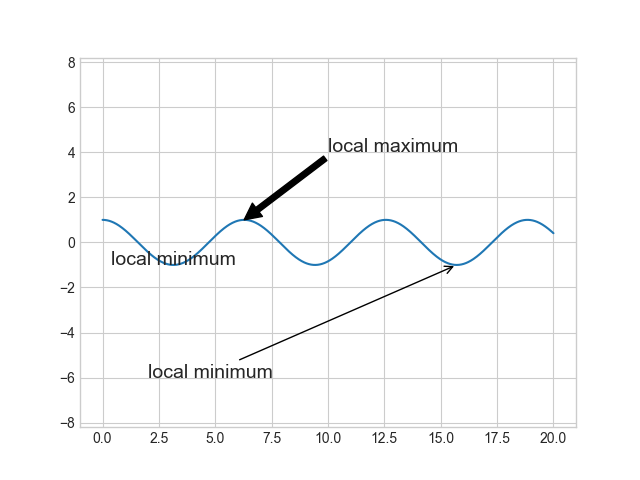

In [30]:
plt.figure() 
x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.axis('equal')

plt.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black'), fontsize=14)
plt.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6), arrowprops=dict(arrowstyle="->"), fontsize=14)
plt.text(3.14, -1, 'local minimum', fontsize=14, ha='center'); # (x, y, text)

The arrow style is controlled through the `arrowprops` dictionary, which has numerous options available.

#### Customizing ticks and splines

`Matplotlib`'s default tick locators and formatters are generally sufficient for many common situations but are not optimal for every plot. Within each axis, there are major tick marks and minor tick marks. As the names suggest, major ticks are typically more prominent or larger, while minor ticks are usually smaller. You can modify the ticks using the `xticks()` and `yticks()` functions. The first argument is a list of tick locations, and the second argument is a list of tick labels:

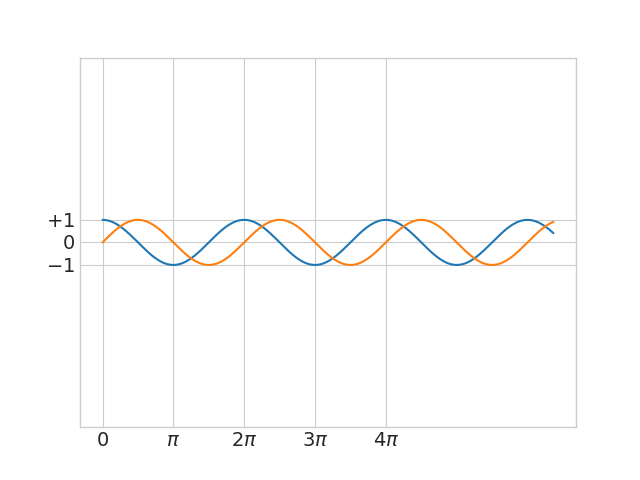

In [31]:
plt.figure() 
x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x))
plt.axis('equal')

# Set the ticks and tick labels
plt.xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi],
           [r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'], fontsize=14)
plt.yticks([-1, 0, +1],  [r'$-1$', r'$0$', r'$+1$'], fontsize=14);

***Spines*** are the lines connecting the axis tick marks and indicating the boundaries of the data area. They can be positioned at arbitrary locations, and by default, they are positioned at the borders of the axis. We'll change that and position them in the middle instead. Since there are four spines (top, bottom, left, and right), we'll remove the top and right spines and move the bottom and left spines to the center:

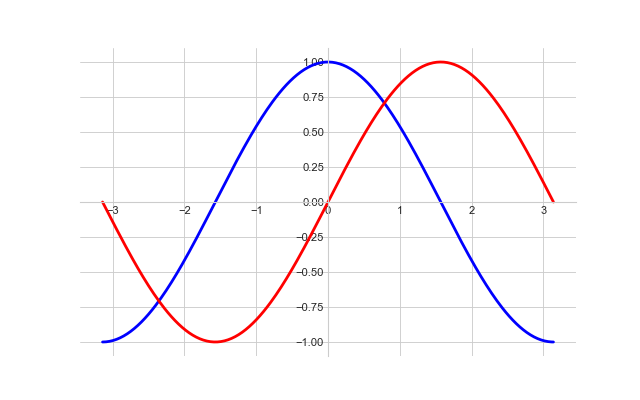

In [32]:
plt.figure(figsize=(8,5), dpi=80)
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C = np.cos(X)
S = np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")

ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

Note that here we also use `plt.figure(figsize=(8,5), dpi=80)` to set the figure size and resolution.

## Multiple Subplots

At times, it's beneficial to compare different views of data side by side. To achieve this, `Matplotlib` has the notion of subplots: collections of smaller axes that can coexist within a single figure. These subplots may be insets, grids of plots, or other more complex layouts.

### `plt.subplots()`

Aligned rows or columns of subplots are a common enough requirement that `Matplotlib` has several convenience routines that make it easy to create them. `plt.subplots()` is the easiest tool to use. Instead of creating a single subplot, **this function creates a complete grid of subplots in one line, and returns them as a `NumPy` array**. The arguments are the number of rows and the number of columns, along with optional keywords `sharex` and `sharey`, which allow you to specify the relationships between different axes.

Let’s create a $2 \times 3$ grid of subplots, and adjust the spacing between them:

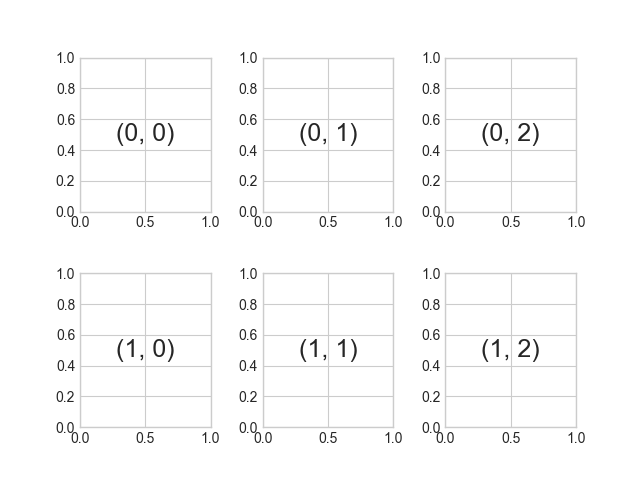

In [35]:
fig, ax = plt.subplots(2, 3)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center', va='center')

The command `plt.subplots_adjust()` can be used to adjust the spacing between subplots (in this case, the space is set to 40% of the subplot width and height). We can then use the subplots to plot different figures:

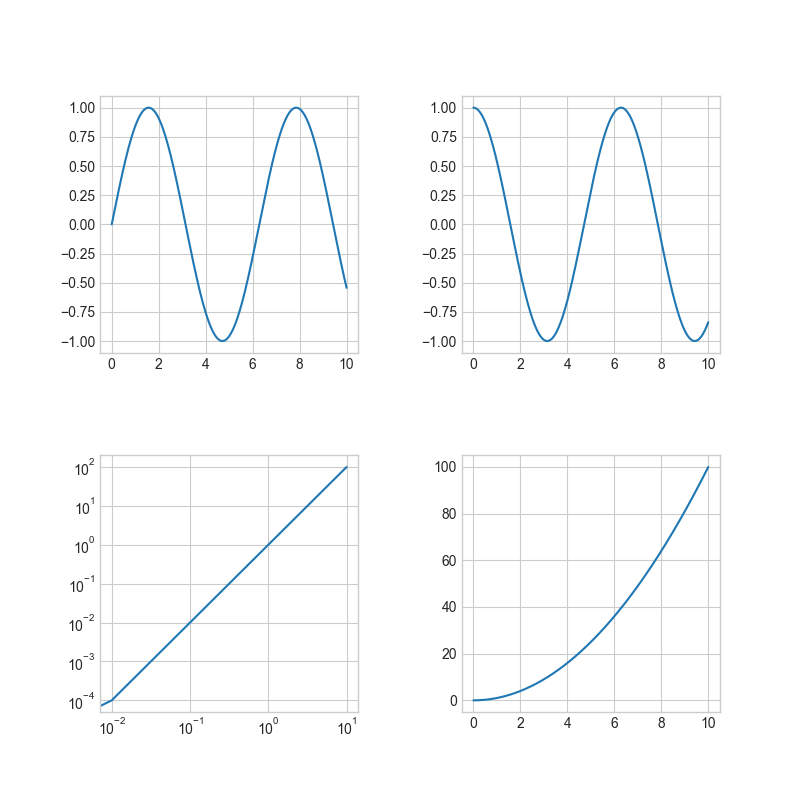

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

x = np.linspace(0, 10, 1000)
ax[0,0].plot(x, np.sin(x))
ax[0,1].plot(x, np.cos(x))
ax[1,0].plot(x, x**2)
ax[1,0].set_xscale('log') # Set the scale to log scale
ax[1,0].set_yscale('log')
ax[1,1].plot(x, x**2);

> ### Exercise 2: Try to plot the function $\frac{1}{x(x-1)}$ within the range -2 to 3 with evenly spaced points. Try to set the point at the discontinuity to `np.nan` so that the point won't be plotted in the figure for better visualization purposes.

Hint: You can use `np.close()` function to find the index of the point closest to the discontinuity.

In [ ]:
# Your code here

In summary, `Matplotlib` is a data visualization library for creating visualizations in `Python`. It provides a wide variety of customizable plots, charts, and graphs, making it a powerful tool for data analysis and communication. With `Matplotlib`, we can create line plots, scatter plots, histograms, and many other types of visualizations. You can customize the appearance of your plots with a wide range of options, including color schemes, fonts, axes labels, and annotations. Refer to [https://matplotlib.org/cheatsheets/](https://matplotlib.org/cheatsheets/) for more details.